In [2]:
# DATA COLLECTION
import pandas as pd

df= pd.read_csv(r"C:\Users\Admin\OneDrive - EdunetWorld\Microsoft Teams Chat Files\Documents\construction_project.csv")
df

,Project Type,Start Date,Duration (days),Estimated Cost,Actual Cost,Labour Hours,Material Cost,Profit,Status
0,Residential,2023-02-16,181,412854.10,451263.54,2229,168387.02,38409.44,Delayed
1,Residential,2022-01-03,187,118027.13,107374.47,572,73716.26,-10652.66,In Progress
2,Residential,2022-11-25,292,482776.03,531814.46,3630,277353.77,49038.43,Cancelled
3,Industrial,2022-08-19,117,81666.04,90764.16,3865,49673.08,9098.12,In Progress
4,Residential,2023-07-04,205,331409.94,351662.16,1337,202327.33,20252.22,Completed
...,...,...,...,...,...,...,...,...,...
295,Renovation,2023-09-18,310,401492.06,372710.73,4482,177349.37,-28781.33,In Progress
296,Industrial,2022-10-10,134,353084.99,397572.91,4997,152284.41,44487.92,Delayed
297,Infrastructure,2022-08-20,76,422193.69,481010.35,2962,271046.94,58816.66,Cancelled
298,Residential,2023-07-22,140,137361.25,134076.96,4302,82073.33,-3284.29,Completed


In [9]:
# DATA PREPROCESSING
'''df['Start_Date'] = pd.to_datetime(df['Start_Date']): Converts a string to a datetime object for 
better date/time manipulation.'''

df['Start Date']=pd.to_datetime(df['Start Date'])
df['Start Date']


0     2023-02-16
1     2022-01-03
2     2022-11-25
3     2022-08-19
4     2023-07-04
         ...    
295   2023-09-18
296   2022-10-10
297   2022-08-20
298   2023-07-22
299   2023-05-21
Name: Start Date, Length: 300, dtype: datetime64[ns]

In [10]:
'''df['Project_Type'] = df['Project_Type'].astype('category').cat.codes: 
Converts categorical project types to numeric codes for use in machine learning models.'''

df['Project Type'] = df['Project Type'].astype('category').cat.codes
df['Project Type']

0      4
1      4
2      4
3      1
4      4
      ..
295    3
296    1
297    2
298    4
299    2
Name: Project Type, Length: 300, dtype: int8

In [11]:
'''df['Status'] = df['Status'].astype('category').cat.codes: Converts categorical status 
values into numeric codes for easier model interpretation.'''

df['Status'] = df['Status'].astype('category').cat.codes
df['Status']

0      2
1      3
2      0
3      3
4      1
      ..
295    3
296    2
297    0
298    1
299    0
Name: Status, Length: 300, dtype: int8

Text(0.5, 1.0, 'Estimated Cost Distribution')

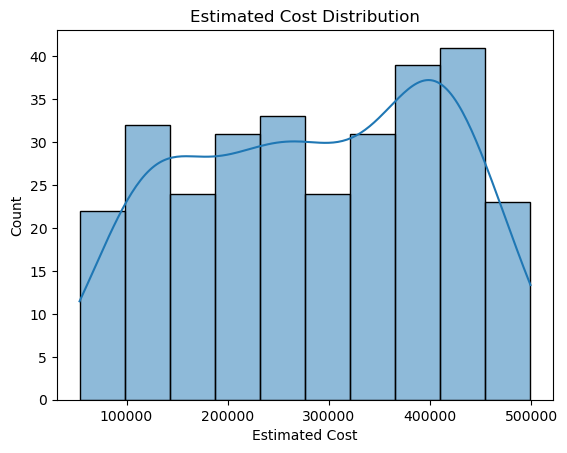

In [13]:
# EXPLORATORY DATA ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

# Cost distribution
sns.histplot(df['Estimated Cost'],kde=True)
plt.title('Estimated Cost Distribution')

<Axes: xlabel='Project Type', ylabel='Profit'>

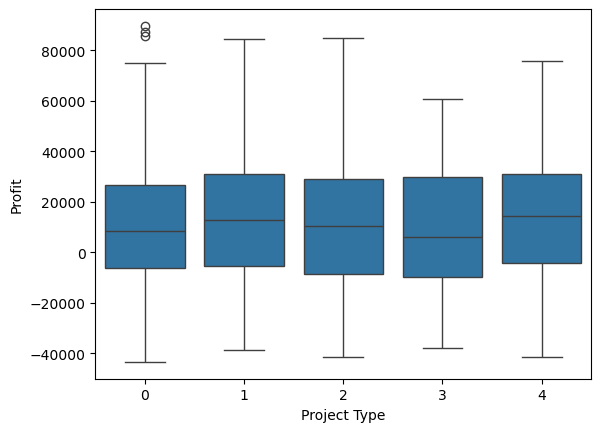

In [14]:
# Profit by Project Type
sns.boxplot(x='Project Type', y='Profit' ,data=df)

<Axes: >

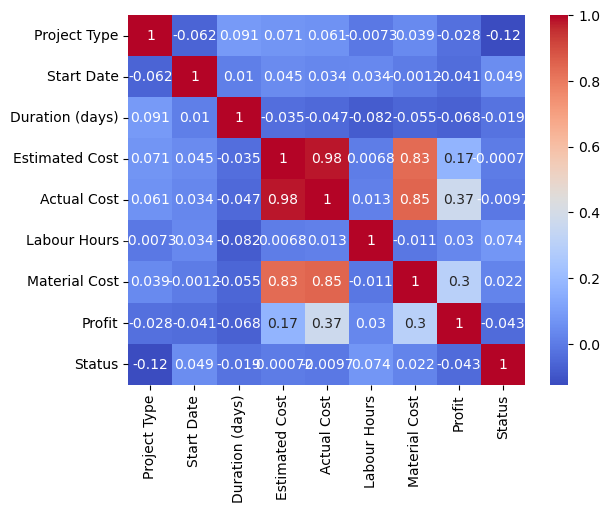

In [15]:
# Correaltion Heatmap

corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [16]:
# FEATURE ENGINEERING 

df['Cost_Overrun']=df['Actual Cost']-df['Estimated Cost']
df['Cost_Overrun']

0      38409.44
1     -10652.66
2      49038.43
3       9098.12
4      20252.22
         ...   
295   -28781.33
296    44487.92
297    58816.66
298    -3284.29
299    28098.24
Name: Cost_Overrun, Length: 300, dtype: float64

In [17]:
df['Profit_Margin']=df['Profit']/df['Estimated Cost']
df['Profit_Margin']

0      0.093034
1     -0.090256
2      0.101576
3      0.111406
4      0.061109
         ...   
295   -0.071686
296    0.125998
297    0.139312
298   -0.023910
299    0.199684
Name: Profit_Margin, Length: 300, dtype: float64

In [18]:
# MODEL BUILDING

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X=df[['Project Type', 'Duration (days)', 'Estimated Cost', 'Labour Hours', 'Material Cost']]
y= df['Actual Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# MODEL EVALUATION

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred=model.predict(X_test)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('R2 Score:',r2_score(y_test,y_pred))

MAE: 23339.725811666674
RMSE: 30135.788190546788
R2 Score: 0.9355386682209883


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
# PREDICTION ON NEW DATA

new_data = [[3, 200, 5500000, 6000, 6000000]]  # example values
predicted_cost = model.predict(new_data)
print("Predicted Actual Cost:", predicted_cost)

Predicted Actual Cost: [476203.0199]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


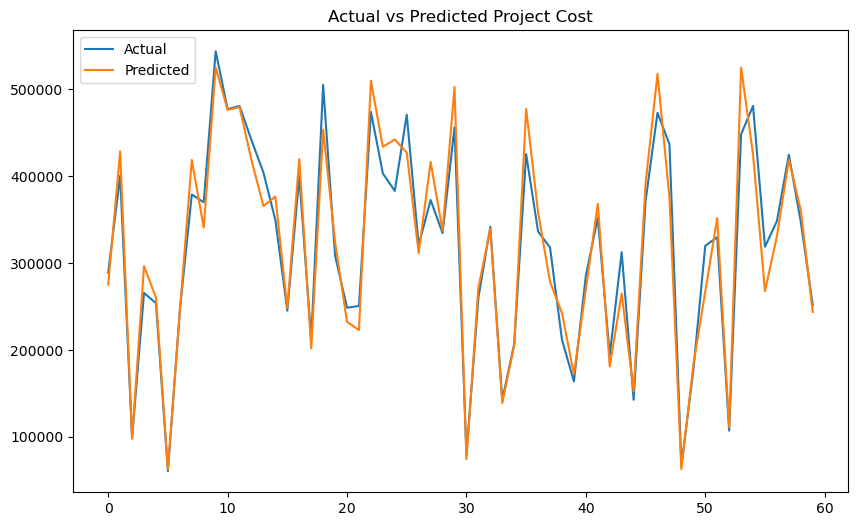

In [22]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Project Cost")
plt.show()